# Kütüphanelerimizi import ettik

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

# Cifar_10 veri setimizi indirdik

In [2]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# EDA - Exploratory Data Analysis

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train.dtype

dtype('uint8')

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train.dtype

dtype('uint8')

In [7]:
x_test.shape

(10000, 32, 32, 3)

In [8]:
x_test.dtype

dtype('uint8')

In [9]:
y_test.shape

(10000, 1)

In [10]:
y_test.dtype

dtype('uint8')

# veriyi normalize ettik

In [11]:
# Veriyi normalize ettik (0-1 arasında olacak şekilde)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Etiketleri one-hot encoding ile dönüştürüp vektör şekline getirdik
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# CNN modeli oluşturduk

In [12]:
model = Sequential([
    # İlk Evrişim Katmanı
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(), 
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  

    # İkinci Evrişim Katmanı
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Üçüncü Evrişim Katmanı
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Tam Bağlantılı Katman
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5), 
    Dense(10, activation='softmax') 
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# modeli eğittik

In [13]:
history=model.fit(x_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.2922 - loss: 2.0755 - val_accuracy: 0.4704 - val_loss: 1.5099
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.4692 - loss: 1.4604 - val_accuracy: 0.5397 - val_loss: 1.3060
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.5378 - loss: 1.2974 - val_accuracy: 0.6084 - val_loss: 1.0969
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.5683 - loss: 1.2010 - val_accuracy: 0.6115 - val_loss: 1.1008
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.6072 - loss: 1.1062 - val_accuracy: 0.6533 - val_loss: 0.9753
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.6286 - loss: 1.0515 - val_accuracy: 0.6197 - val_loss: 1.0974
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.6512 - loss: 0.9949 - val_accuracy: 0.6405 - val_loss: 1.0232
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.6623 - loss: 0.9663 - 

# Test verisi üzerindeki sonucunu gördük

In [14]:
loss,accuracy=model.evaluate(x_test,y_test)
accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7838 - loss: 0.6298


0.7799999713897705

# Grafiği çiziyoruz

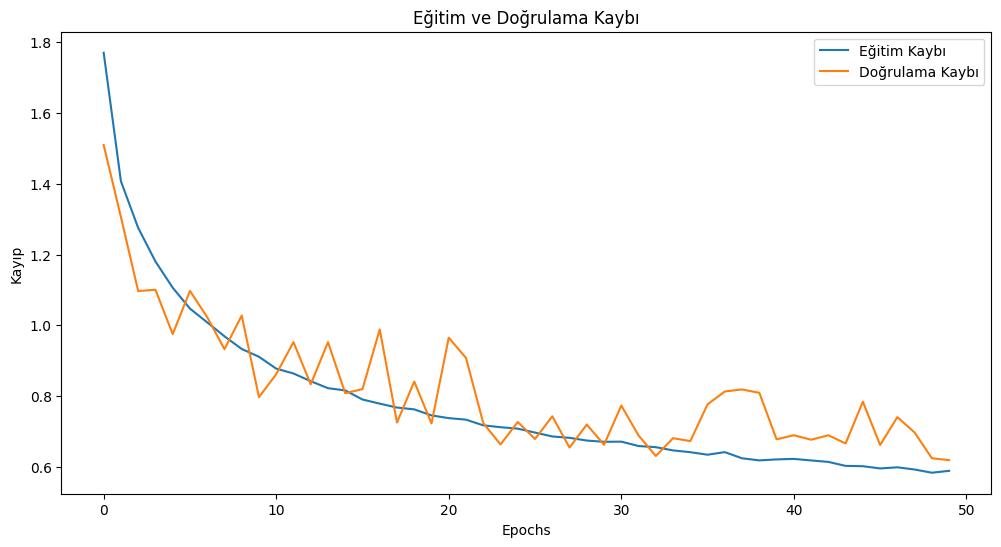

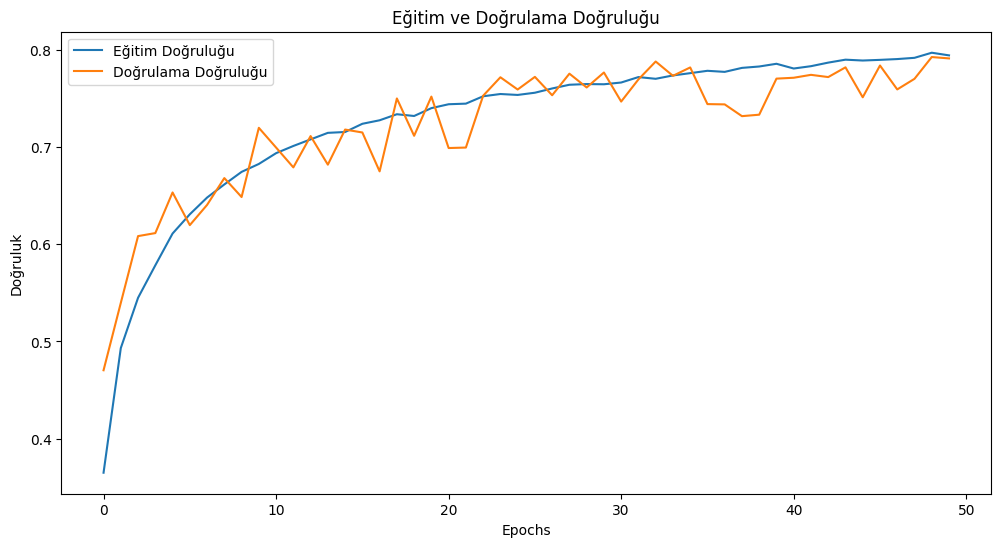

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

# Eğitim ve doğrulama doğruluğunu çiz
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()
